In [196]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics

In [239]:
df = pd.read_csv("customer_analysis.csv", sep="\t")

In [240]:
display(df)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data Cleaning and preparation:

In [241]:
#1
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [242]:
#To remove the NA values
df = df.dropna()
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [243]:
#2
#Dt_Customer to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")

In [244]:
# 3
L = (df.dtypes == 'object')
obj_col = list(L[L].index)
print(f'Categorical Variable in the DataSet:-{obj_col}')

Categorical Variable in the DataSet:-['Education', 'Marital_Status']


# Feature Engineering 

In [245]:
# 1
df['Age'] = 2023-df['Year_Birth']

In [246]:
#2
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts']
+ df['MntSweetProducts'] + df['MntGoldProds']

0       176
1         7
2        63
3         8
4        42
       ... 
2235    365
2236      8
2237     36
2238     91
2239     22
Length: 2216, dtype: int64

In [247]:
# 3
df['Living_With'] = df['Marital_Status'].replace({'Married':'Partner','Together':'Partner',
                                                 'Absurd':'Alone','Widow':'Alone','YOLO':'Alone','Divorced':'Alone','Single':'Alone'})

In [248]:
# 4
df['Children'] = df['Kidhome'] + df['Teenhome']

In [249]:
# 5
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner': 2}) + df['Children']

In [250]:
# 6
df['Is_Parent'] = np.where(df.Children > 0,1,0)

In [251]:
#7
df['Education'] = df['Education'].replace({'Basic':'Undergraduate','2nd Cycle':'Undergraduate','2n Cycle':'Undergraduate',
                                          'Graduation':'Graduate','Master':'Postgraduate','PhD':'Postgraduate'})

In [252]:
# 8
drop_col = ["Marital_Status", "Kidhome", "Teenhome", "MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntGoldProds", "MntSweetProducts",  "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID",'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain','Response']
df = df.drop(drop_col, axis=1)

In [253]:
display(df)

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,58,3,8,10,4,7,66,1441,Alone,0,1,0
1,Graduate,46344.0,38,2,1,1,2,5,69,20,Alone,2,3,1
2,Graduate,71613.0,26,1,8,2,10,4,58,713,Partner,0,2,0
3,Graduate,26646.0,26,2,2,0,4,6,39,45,Partner,1,3,1
4,Postgraduate,58293.0,94,5,5,3,6,5,42,380,Partner,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduate,61223.0,46,2,9,3,4,5,56,976,Partner,1,3,1
2236,Postgraduate,64014.0,56,7,8,2,5,7,77,436,Partner,3,5,1
2237,Graduate,56981.0,91,1,2,3,13,6,42,1205,Alone,0,1,0
2238,Postgraduate,69245.0,8,2,6,5,10,3,67,752,Partner,1,3,1


# Data Preparation

In [254]:
# 1
df['Education'] = LabelEncoder().fit_transform(df['Education'])
df['Living_With'] = LabelEncoder().fit_transform(df['Living_With'])
display(df)

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,0,58138.0,58,3,8,10,4,7,66,1441,0,0,1,0
1,0,46344.0,38,2,1,1,2,5,69,20,0,2,3,1
2,0,71613.0,26,1,8,2,10,4,58,713,1,0,2,0
3,0,26646.0,26,2,2,0,4,6,39,45,1,1,3,1
4,1,58293.0,94,5,5,3,6,5,42,380,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,46,2,9,3,4,5,56,976,1,1,3,1
2236,1,64014.0,56,7,8,2,5,7,77,436,1,3,5,1
2237,0,56981.0,91,1,2,3,13,6,42,1205,0,0,1,0
2238,1,69245.0,8,2,6,5,10,3,67,752,1,1,3,1


In [255]:
#2
scaled_df = StandardScaler().fit_transform(df)
display(scaled_df)

array([[-0.89418706,  0.2340627 ,  0.31053212, ..., -1.26480327,
        -1.75867284, -1.5813886 ],
       [-0.89418706, -0.23455948, -0.38050944, ...,  1.40580564,
         0.45000895,  0.63235564],
       [-0.89418706,  0.76947764, -0.79513438, ..., -1.26480327,
        -0.65433195, -1.5813886 ],
       ...,
       [-0.89418706,  0.18809052,  1.4507507 , ..., -1.26480327,
        -1.75867284, -1.5813886 ],
       [ 0.56926828,  0.67538765, -1.41707178, ...,  0.07050118,
         0.45000895,  0.63235564],
       [ 0.56926828,  0.02470453, -0.31140528, ...,  1.40580564,
         1.55434984,  0.63235564]])

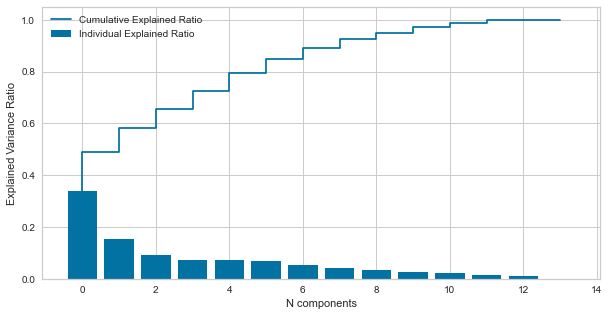

In [275]:
# 3
pca = PCA()
pca.fit(scaled_df)
cum_sum_eigenvalues = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10,5))
plt.bar(range(0, len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, label="Individual Explained Ratio")
plt.step(range(0, len(cum_sum_eigenvalues)), cum_sum_eigenvalues, label="Cumulative Explained Ratio")
plt.xlabel("N components")
plt.ylabel("Explained Variance Ratio")
plt.legend(loc="best")
plt.show()

The first 6 components have slightly more than 80% of the informations

In [281]:
pca = PCA(n_components=6)
pca.fit(scaled_df)
pca_df = pd.DataFrame(pca.fit_transform(scaled_df), columns=(["PCA1", "PCA2", "PCA3", "PCA4", "PCA5", "PCA6"]))
pca_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PCA1,2216.0,-4.769550e-17,2.175249,-6.117718,-1.848732,-0.450075,1.544247,6.361258
PCA2,2216.0,-1.381767e-16,1.464096,-4.177289,-1.028000,-0.126586,0.954448,6.012006
PCA3,2216.0,3.286581e-17,1.122949,-3.242074,-0.904199,-0.242862,0.882079,5.460692
PCA4,2216.0,-2.931182e-17,1.019707,-2.690585,-0.742285,-0.023902,0.691643,3.212394
PCA5,2216.0,4.088186e-17,0.994819,-3.085625,-0.697952,-0.012290,0.686095,6.681116
PCA6,2216.0,-4.319900e-17,0.987244,-3.398109,-0.727103,0.020406,0.681993,3.448935


# Clustering

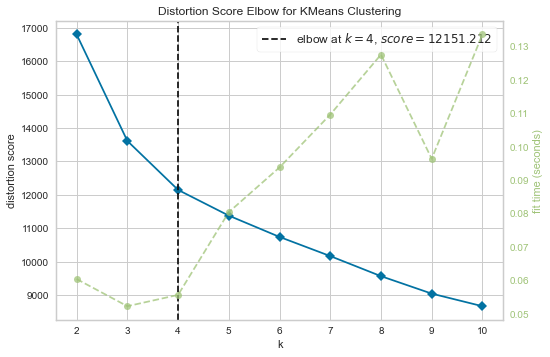

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [282]:
# 1
elbow_d = KElbowVisualizer(KMeans(),k=10)
elbow_d.fit(pca_df)
elbow_d.show()

In [283]:
# 2
ac = AgglomerativeClustering(n_clusters=4)
yhat_ac = ac.fit_predict(pca_df)
pca_df['Cluster'] = yhat_ac
df['Cluster'] = yhat_ac
df['Count'] = df.groupby('Cluster')['Income'].transform('count').astype(int)
df.groupby('Cluster').mean()

,Education,Income,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Count
Cluster,,,,,,,,,,,,,,,
0,0.619784,60356.888717,51.610510,3.755796,6.468315,3.612056,7.879444,5.636785,56.601236,741.222566,0.670788,1.190108,2.860896,0.962906,647.0
1,0.559671,77452.226337,49.537037,1.030864,4.969136,5.909465,8.341564,2.598765,55.267490,1238.302469,0.594650,0.008230,1.602881,0.008230,486.0
2,0.662309,34243.908497,48.897603,1.978214,2.215686,0.684096,3.278867,6.440087,52.028322,90.797386,0.180828,1.032680,2.213508,0.723312,459.0
3,0.604167,37450.746795,45.995192,2.099359,2.301282,0.634615,3.522436,6.283654,52.403846,103.996795,1.000000,1.363782,3.363782,1.000000,624.0


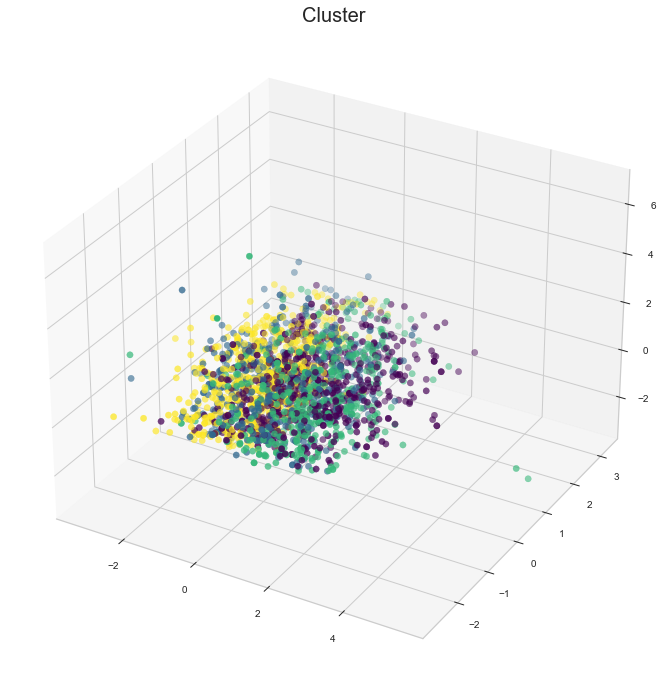

In [284]:
# 3
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(111, projection='3d',label='bla')
ax.scatter(x,y,z, s=40, c=pca_df['Cluster'],marker='o',cmap=cmap)
ax.set_title('Cluster',fontsize=20)
plt.show()

# Visualization

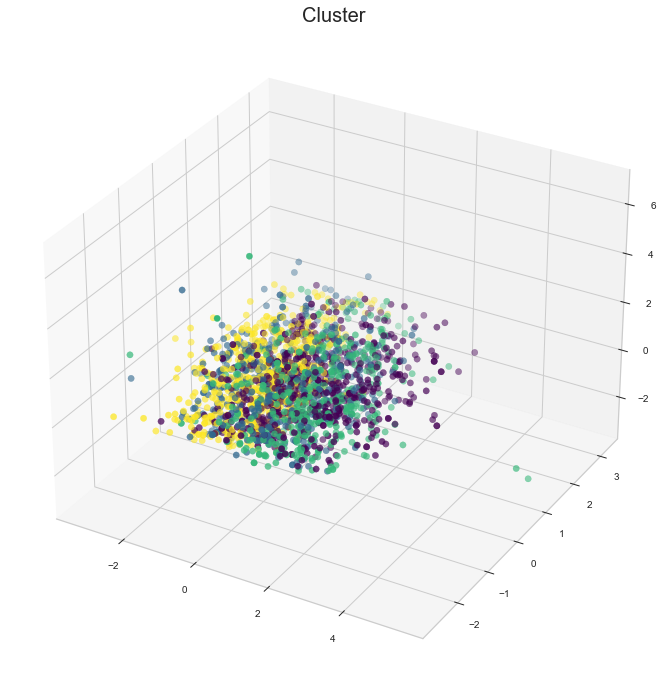

In [285]:
# 1
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(18,12))
ax = plt.subplot(111, projection='3d',label='bla')
ax.scatter(x,y,z, s=40, c=pca_df['Cluster'],marker='o',cmap=cmap)
ax.set_title('Cluster',fontsize=20)
plt.show()

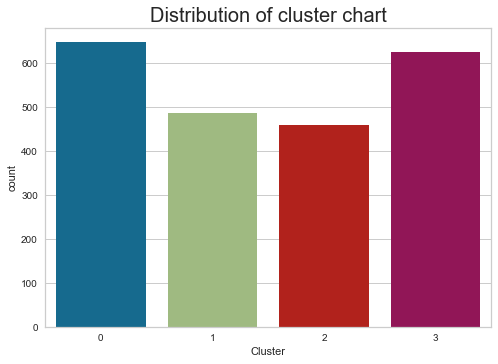

In [286]:
# 2
# count plot of our cluster
plo = sns.countplot(x=df['Cluster'])
plo.set_title('Distribution of cluster chart',fontsize=20)
plt.show()

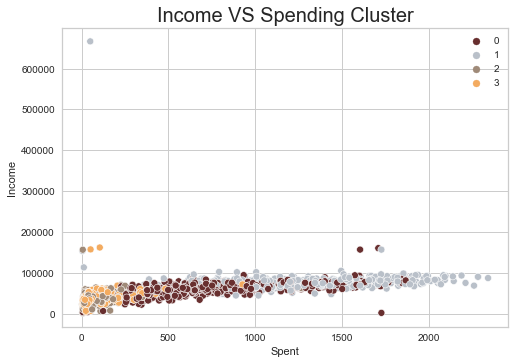

In [287]:
# 3
pl = sns.scatterplot(data = df, x= df['Spent'],y=df['Income'], hue=df['Cluster'], palette = pal)
pl.set_title('Income VS Spending Cluster',fontsize=20)
plt.legend()
plt.show()

Income vs. Spend:

Group 0: High spending with average income.

Group 1: High spending with high income.

Group 2: Low spending with low income.

Group 3: High spending with low income.

<Figure size 576x396 with 0 Axes>

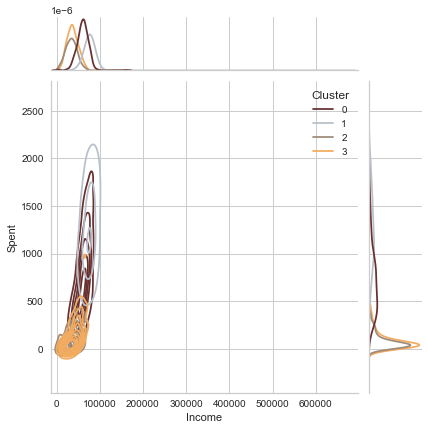

In [288]:
    plt.figure()
    sns.jointplot(x=df['Income'],y=df['Spent'],hue=df['Cluster'],kind='kde',palette=pal)
    plt.show()